In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors

In [9]:
matplotlib.rc('font', family='Arial') 

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_34772\4053444171.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  heatmap_data.loc[col][col]=np.nan
C:\Users\Yasaman\AppData\Local\Temp\ipykernel_34772\4053444171.py:37: FutureWarning: Chaine

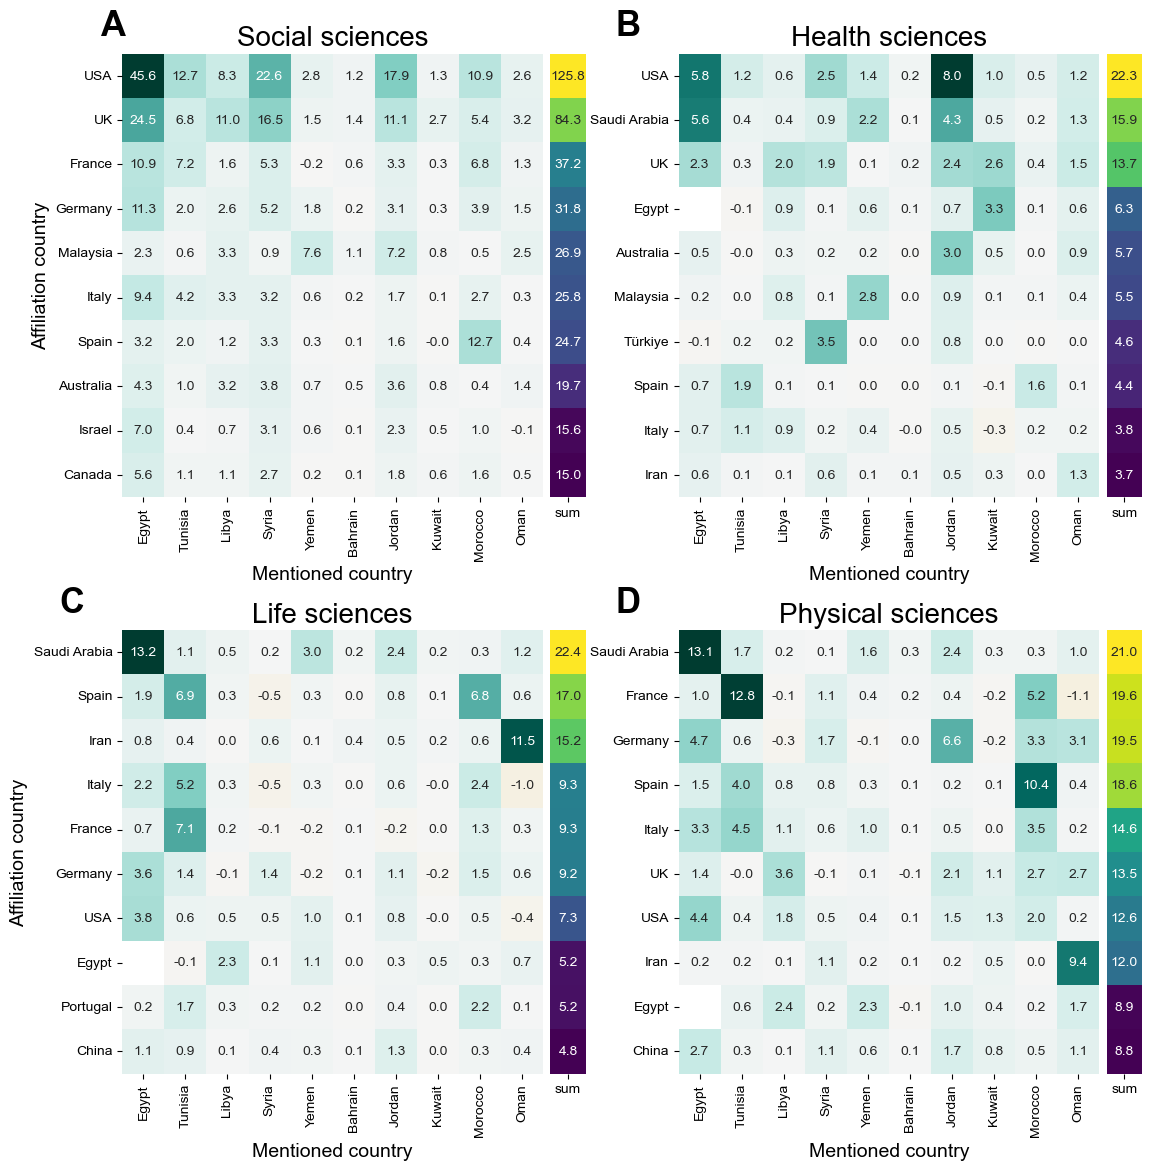

In [12]:
# Create a new figure with custom subplot layout/
start_year, middle_year1,middle_year2, end_year=2002, 2011, 2011, 2020
fig = plt.figure(figsize=(12, 12))

# Create grid specification for subplots
gs = fig.add_gridspec(2, 24)

ax3 = fig.add_subplot(gs[0, 0:10])
ax31 = fig.add_subplot(gs[0, 10])
ax3.text(-0.05, 1.1, 'A', transform=ax3.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')

ax4 = fig.add_subplot(gs[0, 13:23])
ax41 = fig.add_subplot(gs[0, 23])
ax4.text(-0.15, 1.1, 'B', transform=ax4.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')


ax5 = fig.add_subplot(gs[1, 0:10])
ax51 = fig.add_subplot(gs[1, 10])

ax5.text(-0.15, 1.1, 'C', transform=ax5.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')



ax6 = fig.add_subplot(gs[1, 13:23])
ax61 = fig.add_subplot(gs[1, 23])
ax6.text(-0.15, 1.1, 'D', transform=ax6.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')


Results=CDEF([ax3,ax4,ax5,ax6], start_year, middle_year1,middle_year2, end_year)

plot_subsub([ax31,ax41, ax51, ax61], Results)
# Adjust the layout manually
fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, hspace=0.3, wspace=0.2)
fig.savefig('Figure4_B.pdf')
#fig.savefig('Final Figure2-ver3.pdf')

In [10]:
def plot_subsub(axis, Results):
    for ax, res in zip(axis, Results):
        # Create DataFrame
        df = res.reset_index()
        # Set index to country names for better plotting
        df.set_index('Aff_country', inplace=True)
        norm = matplotlib.colors.LogNorm()  # Normalization for the colormap
        sns.heatmap(df[['sum']], annot=True, fmt=".1f", cmap='viridis', cbar=False, norm=norm, ax=ax)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')

In [11]:
def CDEF(axis, start_year, middle_year1,middle_year2, end_year):
    df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
    df=df.rename(columns={'year':'Year', 'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
    Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
    rev_Country_list={Country_list[key]: key for key in Country_list}
    abbr=[country.lower() for country in Country_list.values()]
    country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
    country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
    map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
    map['irn']='Iran'
    map['usa']='USA'
    map['gbr']='UK'
    Results=[]
    social_sciences=['PSYC', 'SOCI', 'DECI', 'ARTS', 'ECON', 'BUSI']
    health_sciences=['MEDI', 'NURS', 'DENT', 'HEAL', 'VETE']
    life_sciences=['PHAR', 'NEUR', 'AGRI', 'IMMU', 'BIOC']
    physical_sciences=['CHEM', 'EART', 'ENER', 'CENG',  'ENVI']
    categories={'Social sciences':social_sciences,"Health sciences":health_sciences, 'Life sciences':life_sciences ,"Physical sciences":physical_sciences }
    
    for ax, category_dict_key in zip(axis, categories.keys()):
        category=categories[category_dict_key]
        filtered_df=df[df['subjarea'].isin(category)]
        before_df=filtered_df[filtered_df['Year'].isin(np.arange(start_year, middle_year1, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_before'})
        after_df=filtered_df[filtered_df['Year'].isin(np.arange(middle_year2, end_year, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_after'})

        compare_df=before_df.merge(after_df, how='outer', on=['Mention_country','Aff_country']).fillna(0)
        compare_df['count_after']/=len(np.arange(start_year, middle_year1, 1))
        compare_df['count_before']/=len(np.arange(middle_year2, end_year, 1))
        compare_df['difference']=compare_df['count_after']-compare_df['count_before']
        compare_df=compare_df[(compare_df['Mention_country'].isin(abbr))&(compare_df['Mention_country']!=compare_df['Aff_country'])]
        compare_df['Mention_country']=compare_df['Mention_country'].map(map)
        compare_df['Aff_country']=compare_df['Aff_country'].map(map)
        heatmap_data = compare_df.drop_duplicates().fillna(0).pivot(index='Aff_country', columns='Mention_country', values='difference')
        heatmap_data=heatmap_data.fillna(0)
        for col in heatmap_data.columns:
            if col in heatmap_data.index:
              heatmap_data.loc[col][col]=np.nan
        row_sums = heatmap_data.sum(axis=1)
        
        heatmap_data['sum']=row_sums
        df_sorted = heatmap_data.loc[row_sums.sort_values(ascending=False).index][:10 :]
        Results.append(df_sorted['sum'])
        df_sorted.rename(index={'Russian Federation':'Russia','United States of America':'USA', 'United Kingdom':'UK', 'United Arab Emirates':'UAE'}, columns={'Syrian Arab Republic':'Syria'}, inplace=True)
        custom_order=list(Country_list.keys())+['sum']
        #print(df_sorted)
        df_sorted = df_sorted[custom_order]
        sns.heatmap(df_sorted.iloc[:, : -1], ax=ax, annot=True, cbar=False,center=0, cmap='BrBG',fmt='.1f',annot_kws={"fontsize":10})
        ax.set_title(category_dict_key, fontsize=20)
        ax.set_xlabel('Mentioned country', fontsize=14)
        if len(Results)%2==1:
            ax.set_ylabel('Affiliation country', fontsize=14)
        else:
            ax.set_ylabel('')
            
    return Results


